In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
import pandas as pd

data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')


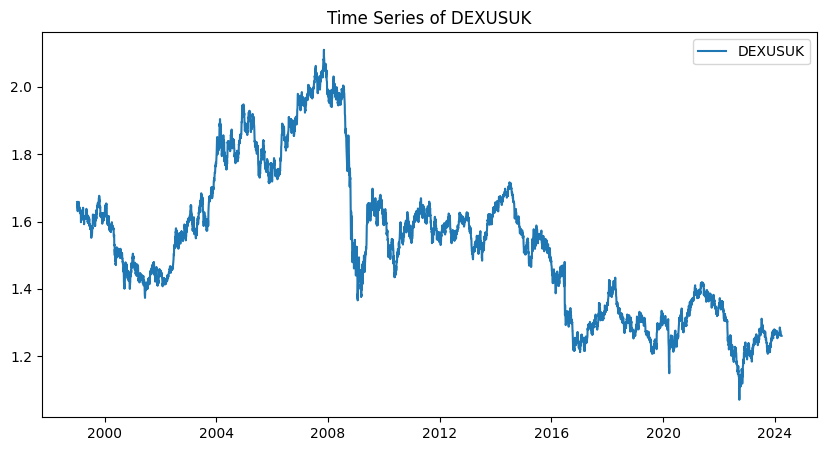

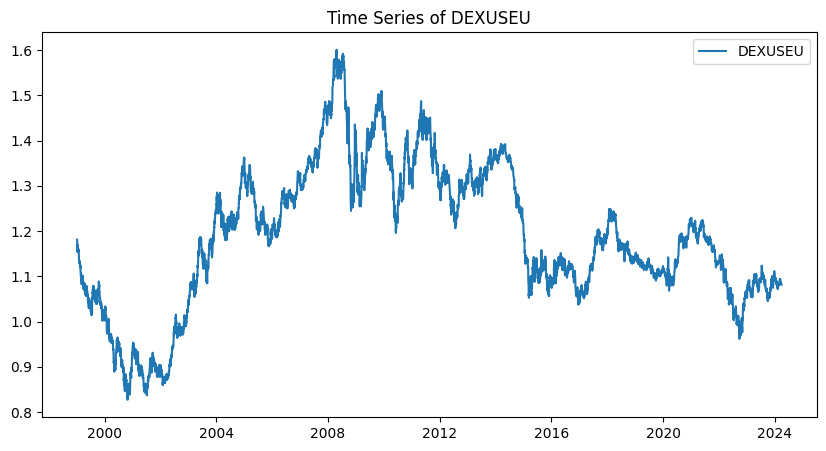

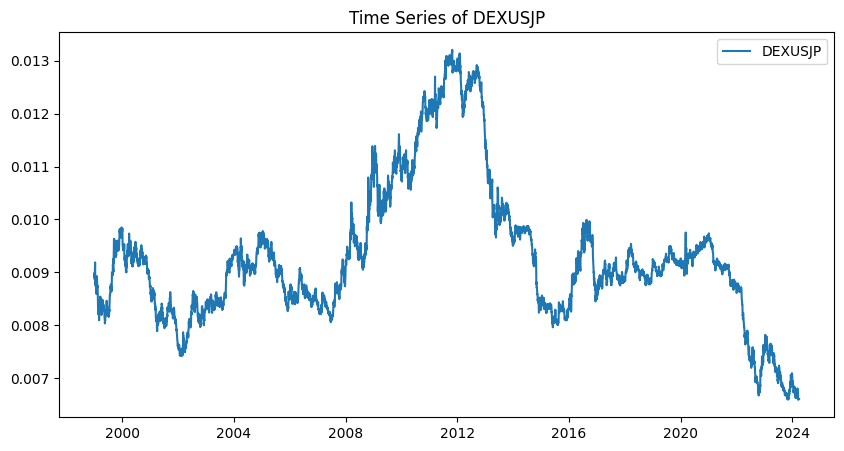

In [3]:
import matplotlib.pyplot as plt

columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('Result:', 'Stationary' if result[1] <= 0.05 else 'Non-Stationary')
    print()

for column in columns:
    adf_test(data[column], title=column)


Augmented Dickey-Fuller Test: DEXUSUK
ADF Test Statistic               -1.319821
p-value                           0.620056
#Lags Used                       11.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSEU
ADF Test Statistic               -1.742222
p-value                           0.409500
#Lags Used                        1.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSJP
ADF Test Statistic               -1.147645
p-value                           0.695703
#Lags Used                        0.000000
Number of Observations Used    6669.000000
Critical Value (1%)              -3.431331
Critical Value (5%)  

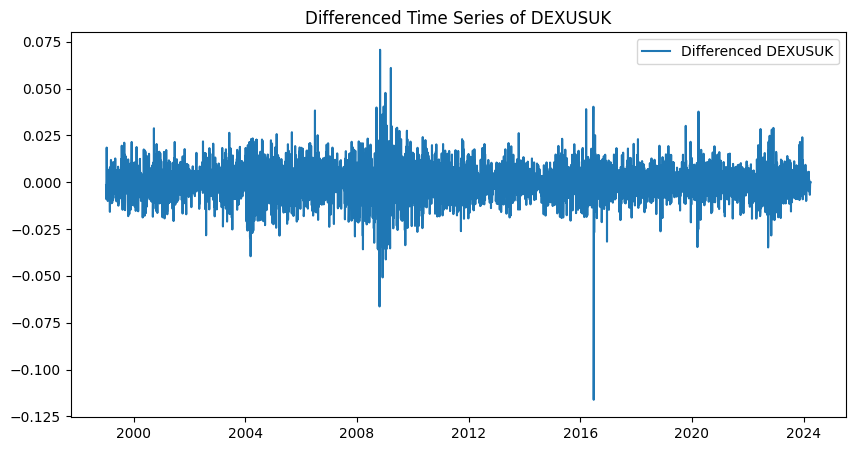

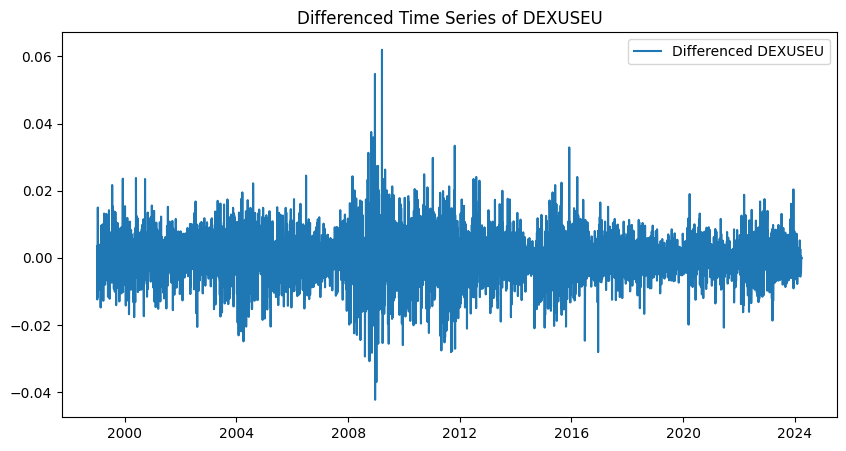

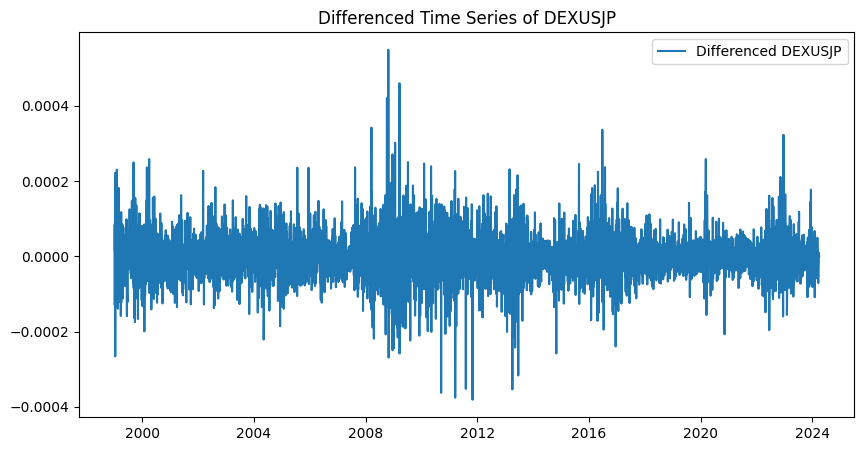

In [5]:
differenced_data = data.diff().dropna()

for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(differenced_data[column], label=f'Differenced {column}')
    plt.title(f'Differenced Time Series of {column}')
    plt.legend()
    plt.show()


In [6]:
for column in columns:
    adf_test(differenced_data[column], title=f'Differenced {column}')
#

Augmented Dickey-Fuller Test: Differenced DEXUSUK
ADF Test Statistic              -25.999106
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSEU
ADF Test Statistic              -79.621763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSJP
ADF Test Statistic              -81.885579
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.

In [7]:
differenced_data

,SPX_Adj_Close,SPX_Volume,DowJonesClose,GDPC1,GFDEBTN,M2SL,MEDCPIM158SFRBCLE,NASDAQ_Close,NETFI,PCECTPI,DEXUSUK,DEXUSJP,DEXUSEU
DATE,,,,,,,,,,,,,
1999-01-05,16.680053,-102000000.0,126.92,0.0,0.0,0.0,0.000000,43.22,0.0,0.0,-0.0015,0.000080,-0.0052
1999-01-06,27.559937,211900000.0,233.78,0.0,0.0,0.0,0.000000,69.59,0.0,0.0,-0.0019,-0.000130,-0.0124
1999-01-07,-2.609986,-123900000.0,-7.21,0.0,0.0,0.0,0.000000,5.23,0.0,0.0,-0.0052,0.000087,0.0036
1999-01-08,5.359986,74800000.0,105.56,0.0,0.0,0.0,0.000000,18.32,0.0,0.0,-0.0090,0.000014,-0.0118
1999-01-11,-11.209961,-119800000.0,-23.43,0.0,0.0,0.0,0.000000,40.18,0.0,0.0,-0.0030,0.000222,-0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,-15.990235,-43340000.0,-162.26,0.0,0.0,0.0,-0.003801,-44.35,0.0,0.0,0.0000,0.000000,0.0000
2024-03-26,-14.609863,540430000.0,-31.31,0.0,0.0,0.0,-0.003801,-68.77,0.0,0.0,0.0000,0.000000,0.0000
2024-03-27,44.910156,-21290000.0,477.75,0.0,0.0,0.0,-0.003801,83.82,0.0,0.0,0.0000,0.000000,0.0000


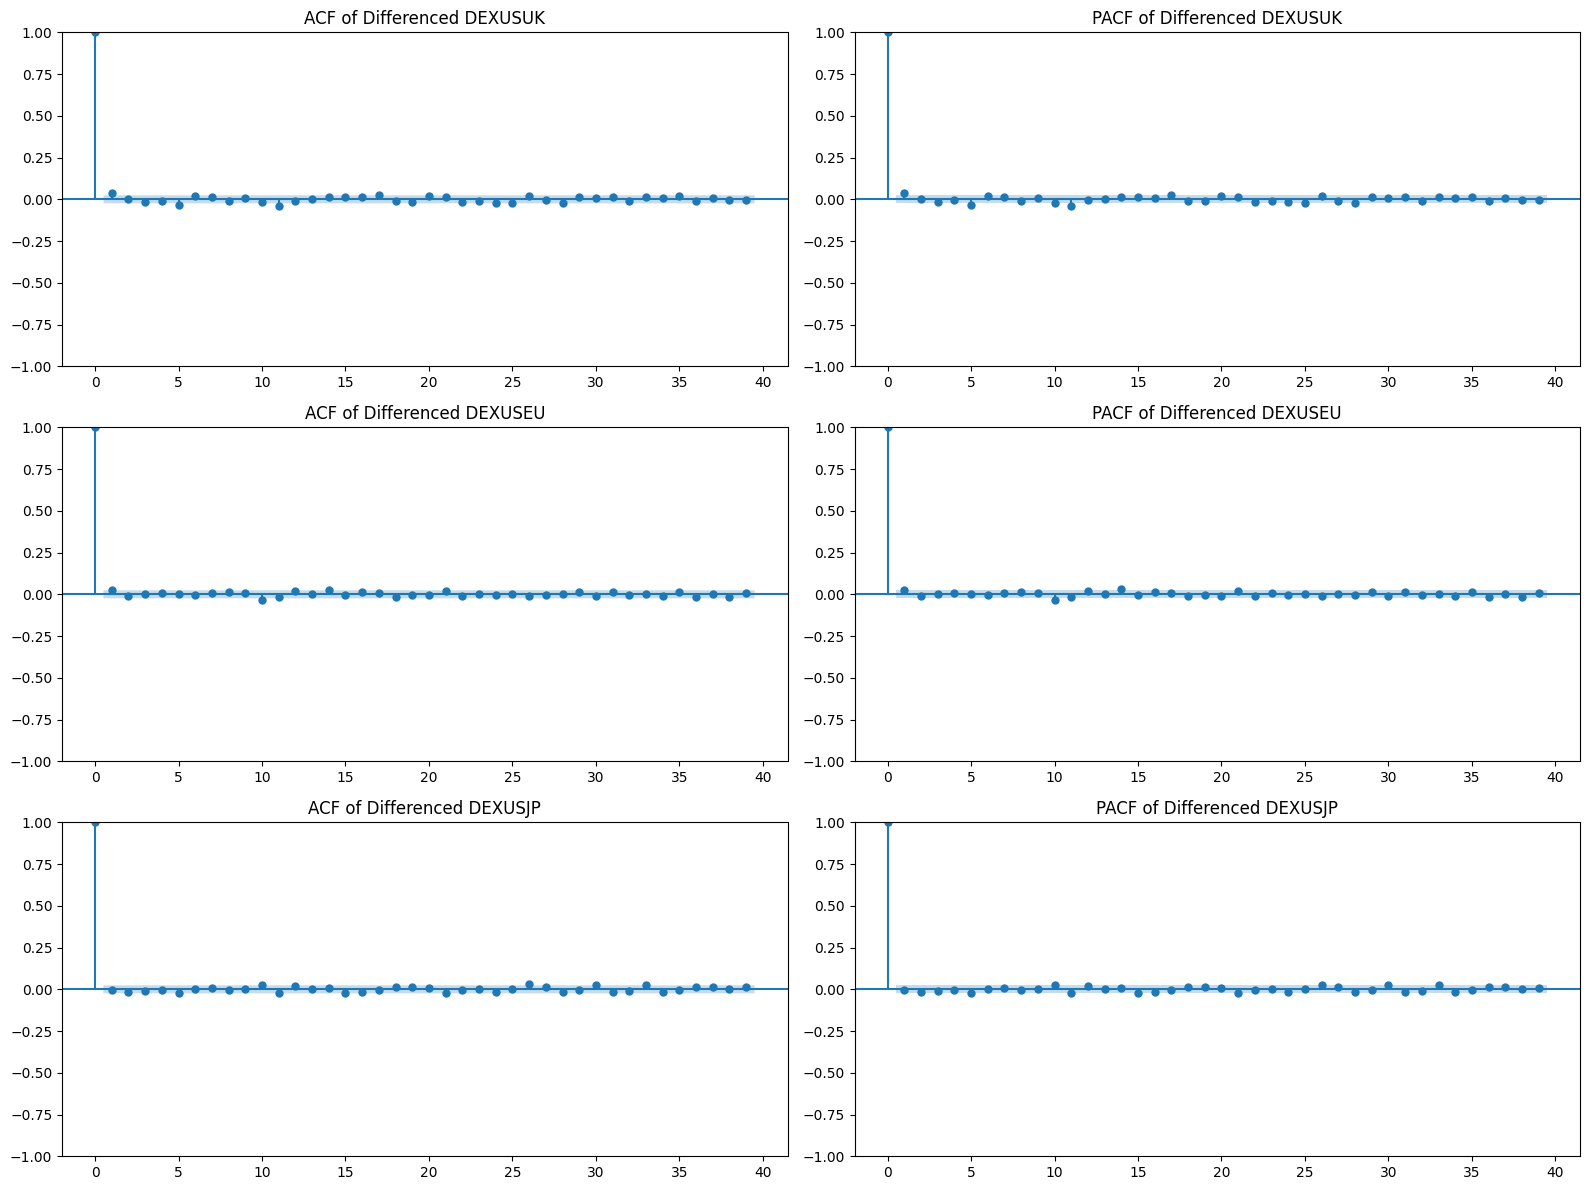

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select the target columns to apply ARIMA on
columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

# Differencing the data to make it stationary
differenced_data = data[columns].diff().dropna()

# Plotting the ACF and PACF for the differenced data
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(16, 12))

for i, column in enumerate(columns):
    plot_acf(differenced_data[column], ax=axes[i, 0], title=f'ACF of Differenced {column}')
    plot_pacf(differenced_data[column], ax=axes[i, 1], title=f'PACF of Differenced {column}')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')

# Select the target columns to apply ARIMAX on
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
# Select the feature columns (exogenous variables)
feature_columns = data.columns.difference(target_columns)

# Print the initial shape of the data
print(f'Initial data shape: {data.shape}')


Initial data shape: (6670, 13)


In [2]:
# Differencing the target columns to make them stationary
differenced_data = data[target_columns].diff().dropna()

# Combine differenced target columns with other predictors
combined_data = pd.concat([differenced_data, data[feature_columns].iloc[1:]], axis=1)

# Drop any rows with NaNs that might have appeared due to misalignment in merging
combined_data.dropna(inplace=True)

# Print the shape of the combined data
print(f'Combined data shape after differencing: {combined_data.shape}')


Combined data shape after differencing: (6669, 13)


In [3]:
# Split the combined data into 80% training and 20% testing
split_ratio = 0.8
split_point = int(len(combined_data) * split_ratio)
train_data = combined_data.iloc[:split_point]
test_data = combined_data.iloc[split_point:]

# Separate the exogenous variables for training and testing
train_exog = train_data[feature_columns]
test_exog = test_data[feature_columns]

# Print shapes to debug
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Train exogenous shape: {train_exog.shape}')
print(f'Test exogenous shape: {test_exog.shape}')


Train data shape: (5335, 13)
Test data shape: (1334, 13)
Train exogenous shape: (5335, 10)
Test exogenous shape: (1334, 10)


In [4]:
# Fit ARIMAX models on training data
models = {}
for column in target_columns:
    try:
        model = SARIMAX(train_data[column], order=(1, 1, 1), exog=train_exog)
        fitted_model = model.fit(disp=False)
        models[column] = fitted_model
        print(f'Summary of ARIMAX model for {column}')
        print(fitted_model.summary())
    except Exception as e:
        print(f'Error fitting ARIMAX model for {column}: {e}')


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary of ARIMAX model for DEXUSUK
                               SARIMAX Results                                
Dep. Variable:                DEXUSUK   No. Observations:                 5335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               17220.364
Date:                Sat, 08 Jun 2024   AIC                         -34414.727
Time:                        15:28:52   BIC                         -34329.163
Sample:                             0   HQIC                        -34384.837
                               - 5335                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
 DowJonesClose    -8.268e-06   1.11e-06     -7.421      0.000   -1.05e-05   -6.08e-06
GDPC1              1.658e-05   2.69e-08    616.778      0.000    1.65e-05 

c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Summary of ARIMAX model for DEXUSEU
                               SARIMAX Results                                
Dep. Variable:                DEXUSEU   No. Observations:                 5335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               18412.916
Date:                Sat, 08 Jun 2024   AIC                         -36799.832
Time:                        15:28:54   BIC                         -36714.268
Sample:                             0   HQIC                        -36769.942
                               - 5335                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
 DowJonesClose    -8.394e-06   8.78e-07     -9.563      0.000   -1.01e-05   -6.67e-06
GDPC1              7.516e-06   2.55e-08    294.814      0.000    7.47e-06 

c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit ARIMAX models on training data
models = {}
metrics = {}

for column in target_columns:
    try:
        model = SARIMAX(train_data[column], order=(1, 1, 1), exog=train_exog)
        fitted_model = model.fit(disp=False)
        models[column] = fitted_model

        # Generate predictions on the training data
        train_predictions = fitted_model.predict(start=0, end=len(train_data)-1, exog=train_exog)

        # Calculate MSE, MAE, and R-squared
        mse = mean_squared_error(train_data[column], train_predictions)
        mae = mean_absolute_error(train_data[column], train_predictions)
        r2 = r2_score(train_data[column], train_predictions)

        metrics[column] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

        print(f'Summary of ARIMAX model for {column}')
        print(fitted_model.summary())
        print(f'MSE: {mse}')
        print(f'MAE: {mae}')
        print(f'R-squared: {r2}')
        
    except Exception as e:
        print(f'Error fitting ARIMAX model for {column}: {e}')

# Print all metrics
print("\nMetrics for all models:")
for column, metric in metrics.items():
    print(f"{column}: MSE={metric['MSE']}, MAE={metric['MAE']}, R-squared={metric['R-squared']}")


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Summary of ARIMAX model for DEXUSUK
                               SARIMAX Results                                
Dep. Variable:                DEXUSUK   No. Observations:                 5335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               17220.364
Date:                Sat, 08 Jun 2024   AIC                         -34414.727
Time:                        15:28:59   BIC                         -34329.163
Sample:                             0   HQIC                        -34384.837
                               - 5335                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
 DowJonesClose    -8.268e-06   1.11e-06     -7.421      0.000   -1.05e-05   -6.08e-06
GDPC1              1.658e-05   2.69e-08    616.778      0.000    1.65e-05 

c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Summary of ARIMAX model for DEXUSEU
                               SARIMAX Results                                
Dep. Variable:                DEXUSEU   No. Observations:                 5335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               18412.916
Date:                Sat, 08 Jun 2024   AIC                         -36799.832
Time:                        15:29:01   BIC                         -36714.268
Sample:                             0   HQIC                        -36769.942
                               - 5335                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
 DowJonesClose    -8.394e-06   8.78e-07     -9.563      0.000   -1.01e-05   -6.67e-06
GDPC1              7.516e-06   2.55e-08    294.814      0.000    7.47e-06 

c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data (update the path to your data file)
data = pd.read_csv('combined_1.csv', index_col='DATE', parse_dates=True)



In [71]:
data.columns

Index(['SPX_Adj_Close', 'SPX_Volume', ' DowJonesClose', 'GDPC1', 'GFDEBTN',
       'M2SL', 'MEDCPIM158SFRBCLE', 'NASDAQ_Close', 'NETFI', 'PCECTPI',
       'DEXUSUK', 'DEXUSJP', 'DEXUSEU'],
      dtype='object')

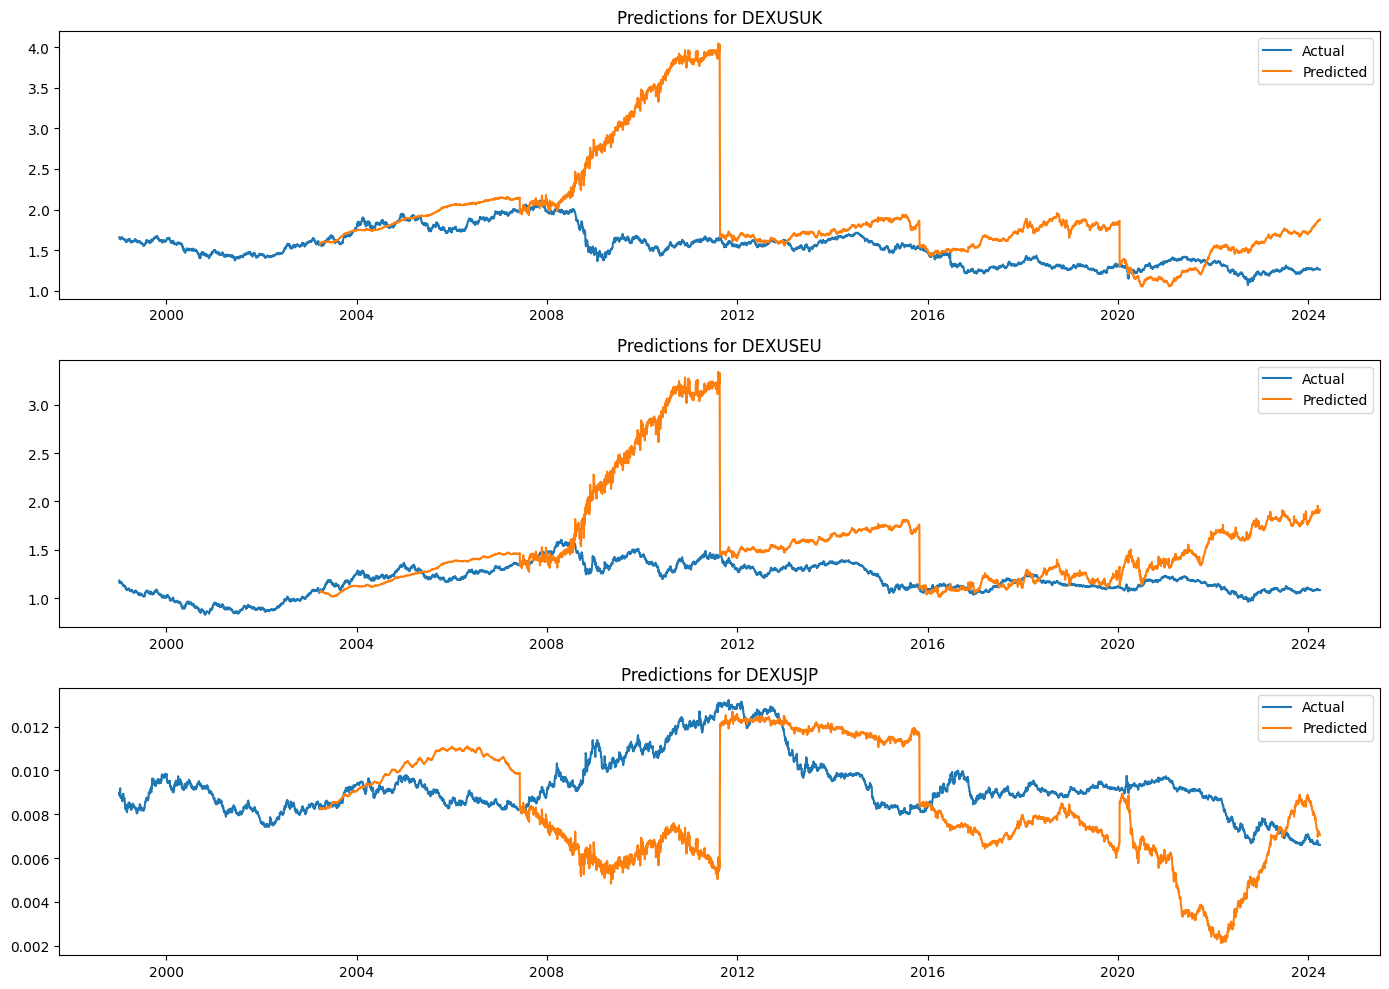

Summary for DEXUSUK
Train Metrics:
MSE: 0.000765
MAE: 0.015270
R-squared: 0.973155

Test Metrics:
MSE: 0.549318
MAE: 0.442748
R-squared: -23.814256

Summary for DEXUSEU
Train Metrics:
MSE: 0.000138
MAE: 0.008025
R-squared: 0.994410

Test Metrics:
MSE: 0.364201
MAE: 0.385597
R-squared: -54.532295

Summary for DEXUSJP
Train Metrics:
MSE: 0.000000
MAE: 0.000250
R-squared: 0.916916

Test Metrics:
MSE: 0.000008
MAE: 0.002315
R-squared: -11.663495


\begin{table}[h]
\centering
\begin{tabular}{lccc}
\hline
Model & MSE (Train) & MAE (Train) & R-squared (Train) \
\hline
DEXUSUK & 7.645874e-04 & 0.015270 & 0.973155 \
DEXUSEU & 1.377310e-04 & 0.008025 & 0.994410 \
DEXUSJP & 1.375656e-07 & 0.000250 & 0.916916 \
\hline
\end{tabular}
\caption{Average training performance metrics of the best ARIMAX models}
\label{tab:train_performance_metrics}
\end{table}


\begin{table}[h]
\centering
\begin{tabular}{lccc}
\hline
Model & MSE (Test) & MAE (Test) & R-squared (Test) \
\hline
DEXUSUK & 5.493179e-01 & 0.4

In [75]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your data (update the path to your data file)
data = pd.read_csv('combined_1.csv', index_col='DATE', parse_dates=True)

# Define the target and exogenous variables
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
exog_vars = ['SPX_Adj_Close', 'SPX_Volume', ' DowJonesClose', 'GDPC1', 'GFDEBTN',
       'M2SL', 'MEDCPIM158SFRBCLE', 'NASDAQ_Close', 'NETFI', 'PCECTPI']

# Best parameters for each target column
best_params = {
    'DEXUSUK': (4, 0, 5),
    'DEXUSEU': (5, 0, 0),
    'DEXUSJP': (3, 0, 5)
}

# Time series split
tscv = TimeSeriesSplit(n_splits=5)

# Store results
results = {col: {'train': {'MSE': [], 'MAE': [], 'R-squared': []}, 'test': {'MSE': [], 'MAE': [], 'R-squared': []}} for col in target_columns}

for train_index, test_index in tscv.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    
    for column in target_columns:
        train_exog, test_exog = train_data[exog_vars], test_data[exog_vars]
        
        # Fit the ARIMAX model
        order = best_params[column]
        model = SARIMAX(train_data[column], order=order, exog=train_exog)
        fitted_model = model.fit(disp=False)
        
        # Predict on the training set
        train_predictions = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1], exog=train_exog)
        train_mse = mean_squared_error(train_data[column], train_predictions)
        train_mae = mean_absolute_error(train_data[column], train_predictions)
        train_r2 = r2_score(train_data[column], train_predictions)
        
        # Predict on the test set
        test_predictions = fitted_model.forecast(steps=len(test_data), exog=test_exog)
        test_mse = mean_squared_error(test_data[column], test_predictions)
        test_mae = mean_absolute_error(test_data[column], test_predictions)
        test_r2 = r2_score(test_data[column], test_predictions)
        
        # Store the results
        results[column]['train']['MSE'].append(train_mse)
        results[column]['train']['MAE'].append(train_mae)
        results[column]['train']['R-squared'].append(train_r2)
        results[column]['test']['MSE'].append(test_mse)
        results[column]['test']['MAE'].append(test_mae)
        results[column]['test']['R-squared'].append(test_r2)

# Calculate average metrics for each target column
average_results = {col: {split: {metric: sum(values) / len(values) for metric, values in metrics.items()} for split, metrics in splits.items()} for col, splits in results.items()}

# Plotting
plt.figure(figsize=(14, 10))

for idx, column in enumerate(target_columns):
    predictions = []
    for train_index, test_index in tscv.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        train_exog, test_exog = train_data[exog_vars], test_data[exog_vars]
        
        # Fit the ARIMAX model
        order = best_params[column]
        model = SARIMAX(train_data[column], order=order, exog=train_exog)
        fitted_model = model.fit(disp=False)
        
        # Predict on the test set
        pred = fitted_model.forecast(steps=len(test_data), exog=test_exog)
        predictions.extend(pred)
    
    # Plot predictions
    plt.subplot(3, 1, idx+1)
    plt.plot(data.index, data[column], label='Actual')
    plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted')
    plt.title(f'Predictions for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# Display average results
for column, splits in average_results.items():
    print(f"Summary for {column}")
    for split, metrics in splits.items():
        print(f"{split.capitalize()} Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.6f}")
        print()

# Generate LaTeX table for performance metrics
latex_table_train = f"""
\\begin{{table}}[h]
\\centering
\\begin{{tabular}}{{lccc}}
\\hline
Model & MSE (Train) & MAE (Train) & R-squared (Train) \\
\\hline
DEXUSUK & {average_results['DEXUSUK']['train']['MSE']:.6e} & {average_results['DEXUSUK']['train']['MAE']:.6f} & {average_results['DEXUSUK']['train']['R-squared']:.6f} \\
DEXUSEU & {average_results['DEXUSEU']['train']['MSE']:.6e} & {average_results['DEXUSEU']['train']['MAE']:.6f} & {average_results['DEXUSEU']['train']['R-squared']:.6f} \\
DEXUSJP & {average_results['DEXUSJP']['train']['MSE']:.6e} & {average_results['DEXUSJP']['train']['MAE']:.6f} & {average_results['DEXUSJP']['train']['R-squared']:.6f} \\
\\hline
\\end{{tabular}}
\\caption{{Average training performance metrics of the best ARIMAX models}}
\\label{{tab:train_performance_metrics}}
\\end{{table}}
"""

latex_table_test = f"""
\\begin{{table}}[h]
\\centering
\\begin{{tabular}}{{lccc}}
\\hline
Model & MSE (Test) & MAE (Test) & R-squared (Test) \\
\\hline
DEXUSUK & {average_results['DEXUSUK']['test']['MSE']:.6e} & {average_results['DEXUSUK']['test']['MAE']:.6f} & {average_results['DEXUSUK']['test']['R-squared']:.6f} \\
DEXUSEU & {average_results['DEXUSEU']['test']['MSE']:.6e} & {average_results['DEXUSEU']['test']['MAE']:.6f} & {average_results['DEXUSEU']['test']['R-squared']:.6f} \\
DEXUSJP & {average_results['DEXUSJP']['test']['MSE']:.6e} & {average_results['DEXUSJP']['test']['MAE']:.6f} & {average_results['DEXUSJP']['test']['R-squared']:.6f} \\
\\hline
\\end{{tabular}}
\\caption{{Average testing performance metrics of the best ARIMAX models}}
\\label{{tab:test_performance_metrics}}
\\end{{table}}
"""

print(latex_table_train)
print(latex_table_test)

In [29]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')
# Function to perform the ADF test
def adf_test(series, signif=0.05):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    return p_value < signif, result

# Function to perform the KPSS test
def kpss_test(series, signif=0.05):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    p_value = result[1]
    return p_value >= signif, result

# Function to differencing
def difference(series):
    return series.diff().dropna()

# Results storage
results = []

# Check stationarity for target columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
for column in target_columns:
    series = data[column]
    adf_stationary, adf_result = adf_test(series)
    kpss_stationary, kpss_result = kpss_test(series)
    
    results.append({
        'Column': column,
        'ADF Test Statistic': adf_result[0],
        'ADF p-value': adf_result[1],
        'ADF Stationary': adf_stationary,
        'KPSS Test Statistic': kpss_result[0],
        'KPSS p-value': kpss_result[1],
        'KPSS Stationary': kpss_stationary
    })
    
    # Apply differencing if not stationary
    if not adf_stationary:
        data[column] = difference(series)

# Check stationarity for exogenous variables
exogenous_columns = ['SPX_Adj_Close', 'SPX_Volume', 'DowJonesClose', 'GDPC1', 'GFDEBTN',
                     'M2SL', 'MEDCPIM158SFRBCLE', 'NASDAQ_Close', 'NETFI', 'PCECTPI']

for column in exogenous_columns:
    series = data[column]
    adf_stationary, adf_result = adf_test(series)
    kpss_stationary, kpss_result = kpss_test(series)
    
    results.append({
        'Column': column,
        'ADF Test Statistic': adf_result[0],
        'ADF p-value': adf_result[1],
        'ADF Stationary': adf_stationary,
        'KPSS Test Statistic': kpss_result[0],
        'KPSS p-value': kpss_result[1],
        'KPSS Stationary': kpss_stationary
    })
    
    # Apply differencing if not stationary
    if not adf_stationary:
        data[column] = difference(series)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df
# Save the differenced dataframe to a CSV file
data.to_csv('differenced_data.csv')

C:\Users\aghab\AppData\Local\Temp\ipykernel_27576\1751051589.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\aghab\AppData\Local\Temp\ipykernel_27576\1751051589.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\aghab\AppData\Local\Temp\ipykernel_27576\1751051589.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\aghab\AppData\Local\Temp\ipykernel_27576\1751051589.py:13: InterpolationWarning: The test statist

,Column,ADF Test Statistic,ADF p-value,ADF Stationary,KPSS Test Statistic,KPSS p-value,KPSS Stationary
0,DEXUSUK,-1.319821,0.620056,False,6.694456,0.01,False
1,DEXUSEU,-1.742222,0.409500,False,2.272363,0.01,False
2,DEXUSJP,-1.147645,0.695703,False,1.807233,0.01,False
3,SPX_Adj_Close,2.237874,0.998912,False,10.023191,0.01,False
4,SPX_Volume,-2.972333,0.037560,True,7.101911,0.01,False
5,DowJonesClose,1.467179,0.997399,False,10.727009,0.01,False
6,GDPC1,-0.274617,0.929023,False,12.470502,0.01,False
7,GFDEBTN,2.002648,0.998676,False,12.315665,0.01,False
8,M2SL,0.984275,0.994097,False,11.870894,0.01,False
9,MEDCPIM158SFRBCLE,-2.978388,0.036963,True,2.790277,0.01,False


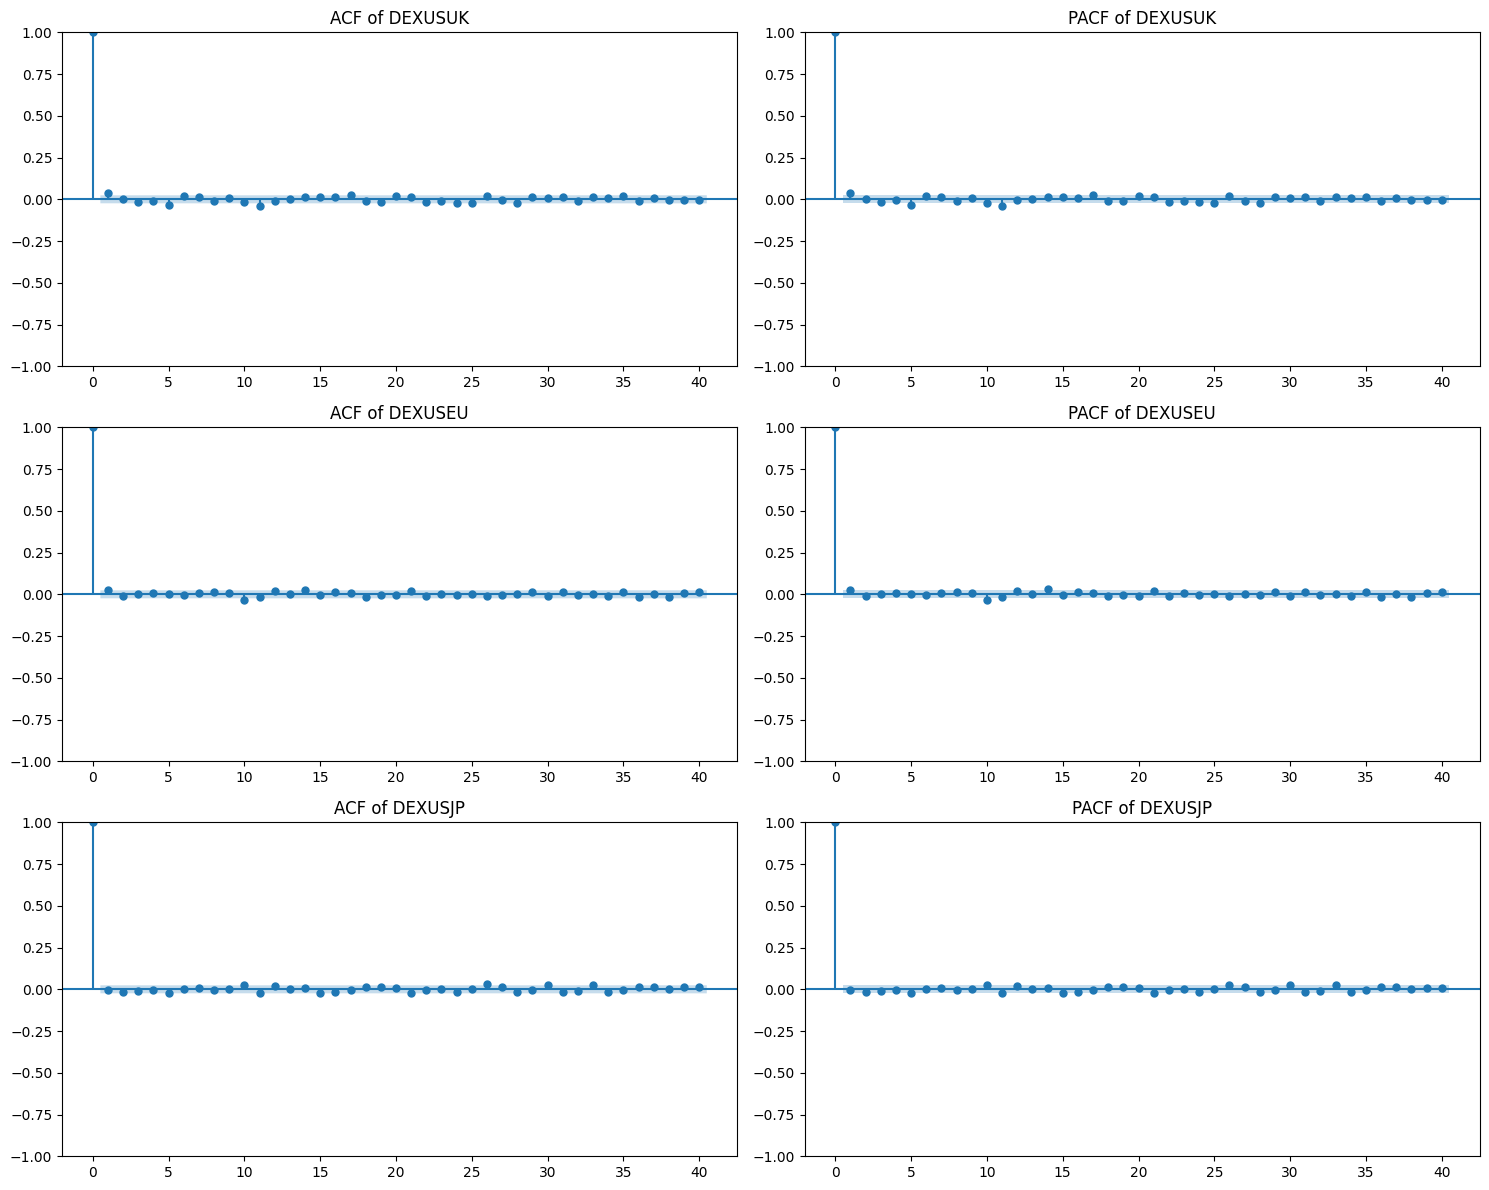

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF for the target columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

plt.figure(figsize=(15, 12))

for i, column in enumerate(target_columns):
    series = data[column]
    
    # Plot ACF
    plt.subplot(len(target_columns), 2, 2*i+1)
    plot_acf(series.dropna(), lags=40, ax=plt.gca())
    plt.title(f'ACF of {column}')
    
    # Plot PACF
    plt.subplot(len(target_columns), 2, 2*i+2)
    plot_pacf(series.dropna(), lags=40, ax=plt.gca())
    plt.title(f'PACF of {column}')

plt.tight_layout()
plt.show()


In [30]:
# Save the differenced dataframe to a CSV file
data.to_csv('differenced_data.csv')